## Random Forest Model For Company Dataset

In [ ]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
company = pd.read_csv("C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Inital EDA

In [9]:
##Checking for maximum and minimum values to decide what will be the cut off point as sales can be considered as high or low
a=company["Sales"].min()
b=company["Sales"].max()
c=company["Sales"].value_counts()
print("min sales",a,"\nmax sales",b,"\ncount of unique sales\n",c)

min sales 0.0 
max sales 16.27 
count of unique sales
 7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64


<AxesSubplot:>

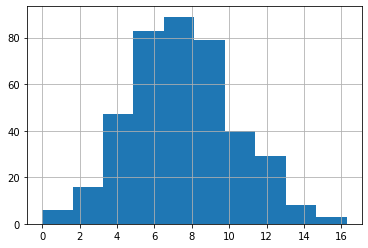

In [13]:
company["Sales"].hist()

In [12]:
##Knowing the middle value by looking into median so that we can find the middle value to check and divide sales into two levels.
np.median(company["Sales"])

7.49

###### Converting it Sales variable into categorical data i.e we have bucketed the data into two levels.
###### Less than 7.5 and greater than 7.5

In [19]:
company.loc[company["Sales"]>=7.5,"sales"]="high"
company.loc[company["Sales"]<7.5,"sales"]="low"

In [20]:
company["sales"].unique()

array(['high', 'low'], dtype=object)

In [21]:
company["sales"].value_counts()

low     201
high    199
Name: sales, dtype: int64

In [22]:
company.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes,high


In [23]:
##Dropping Sales column from the data 
company.drop(["Sales"],axis=1,inplace = True)

In [24]:
company.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high


In [25]:
## Company data has no null values
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

#### No null values eexisting in the given dataset

In [26]:
##Checking the data type
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [28]:
##As, the model cannot be applied directly on object data we need to encode this object variables
def encode_labels(dataset):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

In [29]:
encode_labels(company)

In [30]:
company.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0


In [33]:
features = company.iloc[:,0:10] 
labels = company.iloc[:,10]

In [34]:
##Splitting the data
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,stratify = labels)

In [40]:
print("train data sales value counts:\n",y_train.value_counts(),'\ntrain data sales value counts:\n',y_test.value_counts())


train data sales value counts:
 1    141
0    139
Name: sales, dtype: int64 
train data sales value counts:
 1    60
0    60
Name: sales, dtype: int64


###### As missing values,best feature selection, overfitting problems can be handled by random forest classifier
###### we can start building the model using Random Forest

In [42]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [57]:

array=company.values 
X = array[:,0:8]
Y = array[:,8]
num_trees = 600
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.6849999999999999


###### Finding the best no. of trees and best no. of max features using grid search cv

In [60]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV
import numpy

In [68]:
max_features = numpy.array(range(1,8))
num_trees = numpy.array(range(50,1000,50))
param_grid = dict(n_estimators=num_trees,max_features=max_features)

In [69]:
param_grid

{'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
        700, 750, 800, 850, 900, 950]),
 'max_features': array([1, 2, 3, 4, 5, 6, 7])}

In [70]:
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])})

In [71]:
print(grid.best_score_)

0.7075


In [72]:
print(grid.best_params_)

{'max_features': 2, 'n_estimators': 450}


In [73]:
## building a random forest with best no. max features as 2 and no. of trees as 450
## evaluating the model using Kfold crossvalidation technique
num_trees = 450
max_features = 2
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Users\Anusha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7000000000000001


##### Accuarcay of the model is 70%
